## Dataset Description
Social Anxiety Dataset – Behavioral, Lifestyle & Psychological Factors

This dataset contains 10,000+ samples representing individuals with varying levels of social anxiety, ranging from mild to severe. It is designed for machine learning and data science applications, especially in mental health analysis, early detection models, and behavioral insight studies.

Context
Social anxiety, also known as social phobia, affects millions of people worldwide. It is often linked to a complex mix of behavioral patterns, psychological states, lifestyle choices, and genetic predispositions. This synthetic dataset was crafted to reflect real-world patterns and includes high-anxiety cases to support research in detection and intervention.

Features Included
Demographics: Age, Gender, Occupation
Lifestyle: Sleep hours, Physical activity, Diet quality, Alcohol use, Caffeine intake, Smoking habits
Health & Mental Indicators: Heart rate, Breathing rate, Stress level, Sweating level, Dizziness
Mental Health History: Family history of anxiety, Use of medication, Therapy frequency
Life Events: Recent major life events
Target Variable: Anxiety Level (1-10) – Quantifies the individual’s social anxiety intensity

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from joblib import dump
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('data/enhanced_anxiety_dataset.csv')
df.sample(5, random_state=42)

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
107,35,Female,Engineer,7.7,4.6,561,8,No,No,10,87,27,2,No,No,2,No,9,5.0
5484,42,Other,Teacher,6.3,5.4,208,17,Yes,No,10,82,25,1,No,Yes,0,Yes,4,5.0
6998,46,Male,Scientist,5.4,0.2,367,9,No,Yes,9,93,25,3,Yes,No,6,No,2,10.0
3984,23,Female,Student,6.7,1.1,290,3,Yes,No,1,74,18,2,No,Yes,0,No,9,1.0
3111,26,Male,Teacher,6.4,3.8,36,4,Yes,Yes,3,115,26,4,No,Yes,4,No,8,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  object 
 2   Occupation                         11000 non-null  object 
 3   Sleep Hours                        11000 non-null  float64
 4   Physical Activity (hrs/week)       11000 non-null  float64
 5   Caffeine Intake (mg/day)           11000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 7   Smoking                            11000 non-null  object 
 8   Family History of Anxiety          11000 non-null  object 
 9   Stress Level (1-10)                11000 non-null  int64  
 10  Heart Rate (bpm)                   11000 non-null  int64  
 11  Breathing Rate (breaths/min)       11000 non-null  int

In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(11000, 19)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,11000.0,40.241727,13.236140,18.0,29.0,40.0,51.0,64.0
Sleep Hours,11000.0,6.650691,1.227509,2.3,5.9,6.7,7.5,11.3
Physical Activity (hrs/week),11000.0,2.942136,1.827825,0.0,1.5,2.8,4.2,10.1
Caffeine Intake (mg/day),11000.0,286.090000,144.813157,0.0,172.0,273.0,382.0,599.0
Alcohol Consumption (drinks/week),11000.0,9.701636,5.689713,0.0,5.0,10.0,15.0,19.0
Stress Level (1-10),11000.0,5.856364,2.927202,1.0,3.0,6.0,8.0,10.0
Heart Rate (bpm),11000.0,90.916000,17.325721,60.0,76.0,92.0,106.0,119.0
Breathing Rate (breaths/min),11000.0,20.957545,5.160107,12.0,17.0,21.0,25.0,29.0
Sweating Level (1-5),11000.0,3.080636,1.398877,1.0,2.0,3.0,4.0,5.0
Therapy Sessions (per month),11000.0,2.427818,2.183106,0.0,1.0,2.0,4.0,12.0


In [8]:
df.Occupation.value_counts()

Occupation
Musician      892
Artist        888
Student       878
Nurse         861
Chef          858
Doctor        842
Other         840
Freelancer    838
Engineer      833
Scientist     832
Athlete       822
Lawyer        809
Teacher       807
Name: count, dtype: int64

In [9]:
col_obj = df.select_dtypes(include='object').columns
col_obj

Index(['Gender', 'Occupation', 'Smoking', 'Family History of Anxiety',
       'Dizziness', 'Medication', 'Recent Major Life Event'],
      dtype='object')

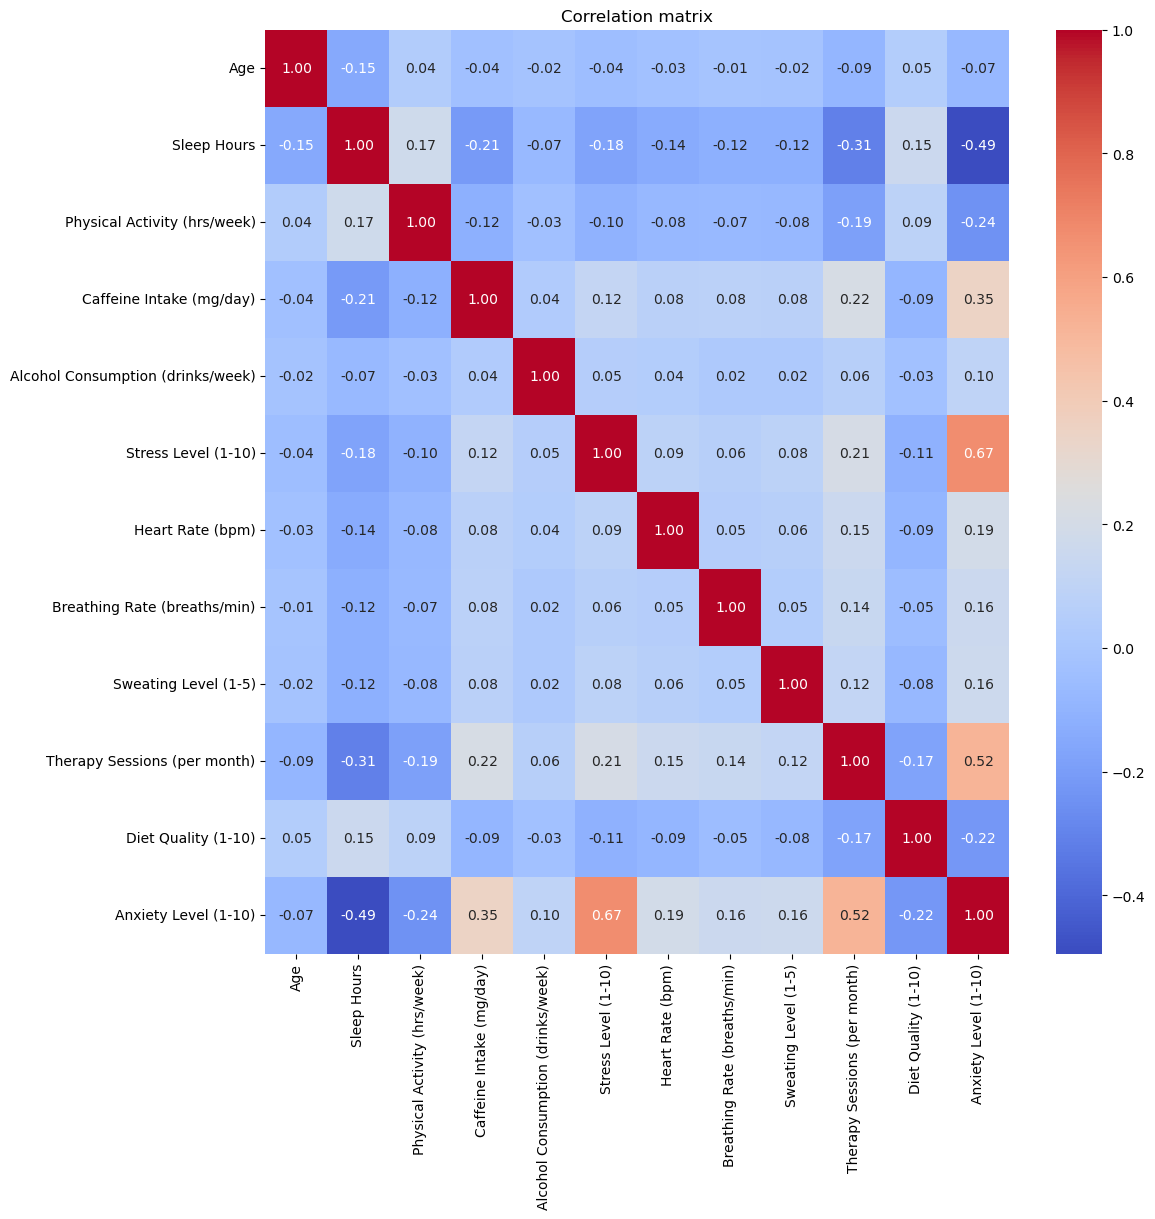

In [10]:
df_corr = df.drop(columns=col_obj)

correlation_matrix = df_corr.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix")
plt.show()

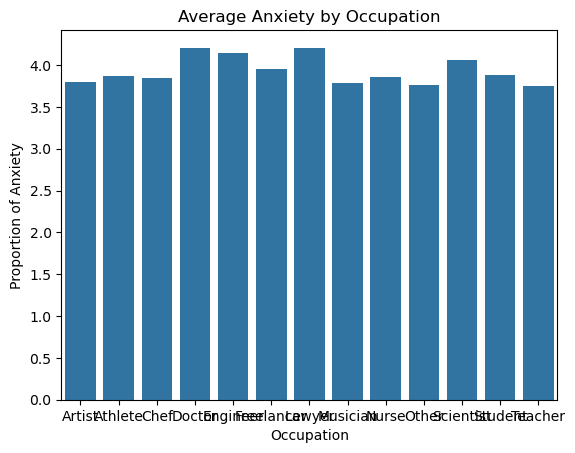

In [11]:
occupation_anxiety = df.groupby('Occupation')['Anxiety Level (1-10)'].mean().reset_index()

sns.barplot(data=occupation_anxiety, x='Occupation', y='Anxiety Level (1-10)')
plt.title('Average Anxiety by Occupation')
plt.ylabel('Proportion of Anxiety')
plt.show()

In [12]:
df.Occupation.value_counts(normalize=True)*100

Occupation
Musician      8.109091
Artist        8.072727
Student       7.981818
Nurse         7.827273
Chef          7.800000
Doctor        7.654545
Other         7.636364
Freelancer    7.618182
Engineer      7.572727
Scientist     7.563636
Athlete       7.472727
Lawyer        7.354545
Teacher       7.336364
Name: proportion, dtype: float64

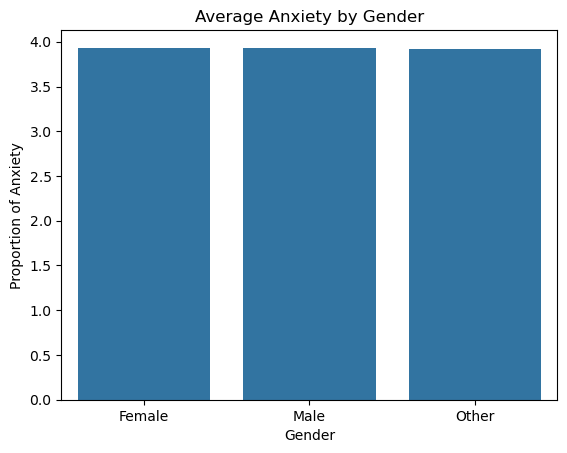

In [13]:
occupation_anxiety = df.groupby('Gender')['Anxiety Level (1-10)'].mean().reset_index()

sns.barplot(data=occupation_anxiety, x='Gender', y='Anxiety Level (1-10)')
plt.title('Average Anxiety by Gender')
plt.ylabel('Proportion of Anxiety')
plt.show()

In [14]:
df.Gender.value_counts(normalize=True)*100

Gender
Female    33.909091
Male      33.245455
Other     32.845455
Name: proportion, dtype: float64

In [15]:
label_encoder_gender = LabelEncoder()
df['Gender_encoded'] = label_encoder_gender.fit_transform(df['Gender'])
dump(label_encoder_gender, 'gender_label_encoder.joblib')

['gender_label_encoder.joblib']

In [16]:
df_encoded = pd.get_dummies(df, columns=['Occupation'])

In [17]:
df_encoded

,Age,Gender,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10),Gender_encoded,Occupation_Artist,Occupation_Athlete,Occupation_Chef,Occupation_Doctor,Occupation_Engineer,Occupation_Freelancer,Occupation_Lawyer,Occupation_Musician,Occupation_Nurse,Occupation_Other,Occupation_Scientist,Occupation_Student,Occupation_Teacher
0,29,Female,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0,0,True,False,False,False,False,False,False,False,False,False,False,False,False
1,46,Other,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0,2,False,False,False,False,False,False,False,False,True,False,False,False,False
2,64,Male,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0,1,False,False,False,False,False,False,False,False,False,True,False,False,False
3,20,Female,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0,0,False,False,False,False,False,False,False,False,False,False,True,False,False
4,49,Female,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0,0,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,23,Female,6.1,3.1,566,9,Yes,No,8,91,28,1,Yes,Yes,1,No,3,6.0,0,False,False,False,False,True,False,False,False,False,False,False,False,False
10996,50,Other,6.6,3.6,64,17,Yes,No,7,95,17,3,No,No,2,No,7,3.0,2,False,False,False,False,False,False,False,False,False,False,False,False,True
10997,29,Male,6.7,6.9,159,14,No,No,8,72,16,1,Yes,Yes,2,Yes,7,4.0,1,False,False,False,False,False,False,False,False,True,False,False,False,False
10998,53,Other,5.7,2.7,248,8,No,No,4,112,28,3,Yes,Yes,1,Yes,2,4.0,2,True,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
object_columns = df_encoded.select_dtypes(include=['object']).columns

def convert_to_numeric(value):
    if value in ['Yes', 'True', 'true', 'YES', 'yes']:
        return 1
    elif value in ['No', 'False', 'false', 'NO', 'no']:
        return 0
    else:
        return value
for column in object_columns:
    df_encoded[column] = df_encoded[column].apply(convert_to_numeric)

In [19]:
df_encoded.select_dtypes(include=['object']).columns

Index(['Gender'], dtype='object')

In [20]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  object 
 2   Sleep Hours                        11000 non-null  float64
 3   Physical Activity (hrs/week)       11000 non-null  float64
 4   Caffeine Intake (mg/day)           11000 non-null  int64  
 5   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 6   Smoking                            11000 non-null  int64  
 7   Family History of Anxiety          11000 non-null  int64  
 8   Stress Level (1-10)                11000 non-null  int64  
 9   Heart Rate (bpm)                   11000 non-null  int64  
 10  Breathing Rate (breaths/min)       11000 non-null  int64  
 11  Sweating Level (1-5)               11000 non-null  int

In [21]:
df['Physical Activity (hrs/week)'].value_counts()

Physical Activity (hrs/week)
1.9     231
2.8     227
1.6     223
2.7     222
2.5     222
       ... 
9.9       1
9.3       1
10.1      1
9.8       1
9.7       1
Name: count, Length: 100, dtype: int64

In [22]:
df['Sleep Hours'].value_counts()

Sleep Hours
6.7     394
7.1     380
6.9     376
6.5     370
6.4     367
       ... 
2.7       2
2.5       1
11.3      1
2.3       1
11.0      1
Name: count, Length: 82, dtype: int64

In [23]:
float_columns = df_encoded.select_dtypes(include=['float']).columns

for column in float_columns:
    df_encoded[column] = df_encoded[column].round().astype(int)

In [24]:
df_encoded['Sleep Hours'].value_counts()

Sleep Hours
7     3221
6     3053
8     2332
5     1196
4      573
9      479
10      81
3       61
2        2
11       2
Name: count, dtype: int64

In [25]:
df_encoded['Physical Activity (hrs/week)'].value_counts()

Physical Activity (hrs/week)
2     2337
4     1920
3     1875
1     1726
5     1096
0      954
6      715
7      228
8      119
9       22
10       8
Name: count, dtype: int64

In [26]:
df_encoded.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,11000.0,40.241727,13.236140,18.0,29.0,40.0,51.0,64.0
Sleep Hours,11000.0,6.647545,1.267214,2.0,6.0,7.0,8.0,11.0
Physical Activity (hrs/week),11000.0,2.936455,1.866744,0.0,2.0,3.0,4.0,10.0
Caffeine Intake (mg/day),11000.0,286.090000,144.813157,0.0,172.0,273.0,382.0,599.0
Alcohol Consumption (drinks/week),11000.0,9.701636,5.689713,0.0,5.0,10.0,15.0,19.0
Smoking,11000.0,0.525364,0.499379,0.0,0.0,1.0,1.0,1.0
Family History of Anxiety,11000.0,0.531545,0.499027,0.0,0.0,1.0,1.0,1.0
Stress Level (1-10),11000.0,5.856364,2.927202,1.0,3.0,6.0,8.0,10.0
Heart Rate (bpm),11000.0,90.916000,17.325721,60.0,76.0,92.0,106.0,119.0
Breathing Rate (breaths/min),11000.0,20.957545,5.160107,12.0,17.0,21.0,25.0,29.0


In [27]:
df_encoded.sample(5, random_state=42)

,Age,Gender,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10),Gender_encoded,Occupation_Artist,Occupation_Athlete,Occupation_Chef,Occupation_Doctor,Occupation_Engineer,Occupation_Freelancer,Occupation_Lawyer,Occupation_Musician,Occupation_Nurse,Occupation_Other,Occupation_Scientist,Occupation_Student,Occupation_Teacher
107,35,Female,8,5,561,8,0,0,10,87,27,2,0,0,2,0,9,5,0,False,False,False,False,True,False,False,False,False,False,False,False,False
5484,42,Other,6,5,208,17,1,0,10,82,25,1,0,1,0,1,4,5,2,False,False,False,False,False,False,False,False,False,False,False,False,True
6998,46,Male,5,0,367,9,0,1,9,93,25,3,1,0,6,0,2,10,1,False,False,False,False,False,False,False,False,False,False,True,False,False
3984,23,Female,7,1,290,3,1,0,1,74,18,2,0,1,0,0,9,1,0,False,False,False,False,False,False,False,False,False,False,False,True,False
3111,26,Male,6,4,36,4,1,1,3,115,26,4,0,1,4,0,8,1,1,False,False,False,False,False,False,False,False,False,False,False,False,True


In [28]:
occupation_columns = df_encoded.filter(like='Occupation_').columns  
df_encoded[occupation_columns] = df_encoded[occupation_columns].astype(int)

In [29]:
df_encoded.sample(5, random_state=42)

,Age,Gender,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10),Gender_encoded,Occupation_Artist,Occupation_Athlete,Occupation_Chef,Occupation_Doctor,Occupation_Engineer,Occupation_Freelancer,Occupation_Lawyer,Occupation_Musician,Occupation_Nurse,Occupation_Other,Occupation_Scientist,Occupation_Student,Occupation_Teacher
107,35,Female,8,5,561,8,0,0,10,87,27,2,0,0,2,0,9,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5484,42,Other,6,5,208,17,1,0,10,82,25,1,0,1,0,1,4,5,2,0,0,0,0,0,0,0,0,0,0,0,0,1
6998,46,Male,5,0,367,9,0,1,9,93,25,3,1,0,6,0,2,10,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3984,23,Female,7,1,290,3,1,0,1,74,18,2,0,1,0,0,9,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3111,26,Male,6,4,36,4,1,1,3,115,26,4,0,1,4,0,8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [30]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Age                                11000 non-null  int64 
 1   Gender                             11000 non-null  object
 2   Sleep Hours                        11000 non-null  int32 
 3   Physical Activity (hrs/week)       11000 non-null  int32 
 4   Caffeine Intake (mg/day)           11000 non-null  int64 
 5   Alcohol Consumption (drinks/week)  11000 non-null  int64 
 6   Smoking                            11000 non-null  int64 
 7   Family History of Anxiety          11000 non-null  int64 
 8   Stress Level (1-10)                11000 non-null  int64 
 9   Heart Rate (bpm)                   11000 non-null  int64 
 10  Breathing Rate (breaths/min)       11000 non-null  int64 
 11  Sweating Level (1-5)               11000 non-null  int64 
 12  Dizz

#### Caffeine Intake (mg/day)

In [31]:
bins = [0.0, 172.0, 382.0, float('inf')]  
labels = ['Low', 'Medium', 'High']
df_encoded['Caffeine Intake Category'] = pd.cut(df_encoded['Caffeine Intake (mg/day)'], bins=bins, labels=labels)

label_encoder_caffeine = LabelEncoder()
df_encoded['Caffeine Intake Encoded'] = label_encoder_caffeine.fit_transform(df_encoded['Caffeine Intake Category'])

dump({'bins': bins, 'labels': labels}, 'caffeine_bin_info.joblib')
dump(label_encoder_caffeine, 'caffeine_label_encoder.joblib')

['caffeine_label_encoder.joblib']

In [32]:
print(df_encoded[['Caffeine Intake (mg/day)', 'Caffeine Intake Category', 'Caffeine Intake Encoded']].head())

   Caffeine Intake (mg/day) Caffeine Intake Category  Caffeine Intake Encoded
0                       181                   Medium                        2
1                       200                   Medium                        2
2                       117                      Low                        1
3                       360                   Medium                        2
4                       247                   Medium                        2


In [33]:
df_encoded.columns

Index(['Age', 'Gender', 'Sleep Hours', 'Physical Activity (hrs/week)',
       'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)',
       'Smoking', 'Family History of Anxiety', 'Stress Level (1-10)',
       'Heart Rate (bpm)', 'Breathing Rate (breaths/min)',
       'Sweating Level (1-5)', 'Dizziness', 'Medication',
       'Therapy Sessions (per month)', 'Recent Major Life Event',
       'Diet Quality (1-10)', 'Anxiety Level (1-10)', 'Gender_encoded',
       'Occupation_Artist', 'Occupation_Athlete', 'Occupation_Chef',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Freelancer',
       'Occupation_Lawyer', 'Occupation_Musician', 'Occupation_Nurse',
       'Occupation_Other', 'Occupation_Scientist', 'Occupation_Student',
       'Occupation_Teacher', 'Caffeine Intake Category',
       'Caffeine Intake Encoded'],
      dtype='object')

In [34]:
df_encoded['Therapy Sessions (per month)'].value_counts()

Therapy Sessions (per month)
1     2508
0     2134
2     2034
3     1416
4     1088
5      699
6      414
7      294
8      235
9      171
10       4
11       2
12       1
Name: count, dtype: int64

In [35]:
therapy_bins = [float('-inf'), 3, 7, float('inf')] 
therapy_labels = ['Low', 'Medium', 'High']         

df_encoded['Therapy Sessions Category'] = pd.cut(df_encoded['Therapy Sessions (per month)'], bins=therapy_bins, labels=therapy_labels)

label_encoder_therapy = LabelEncoder()
df_encoded['Therapy Sessions Encoded'] = label_encoder_therapy.fit_transform(df_encoded['Therapy Sessions Category'])

dump({'bins': therapy_bins, 'labels': therapy_labels}, 'therapy_bin_info.joblib')
dump(label_encoder_therapy, 'therapy_label_encoder.joblib')

['therapy_label_encoder.joblib']

In [36]:
df_encoded.columns

Index(['Age', 'Gender', 'Sleep Hours', 'Physical Activity (hrs/week)',
       'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)',
       'Smoking', 'Family History of Anxiety', 'Stress Level (1-10)',
       'Heart Rate (bpm)', 'Breathing Rate (breaths/min)',
       'Sweating Level (1-5)', 'Dizziness', 'Medication',
       'Therapy Sessions (per month)', 'Recent Major Life Event',
       'Diet Quality (1-10)', 'Anxiety Level (1-10)', 'Gender_encoded',
       'Occupation_Artist', 'Occupation_Athlete', 'Occupation_Chef',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Freelancer',
       'Occupation_Lawyer', 'Occupation_Musician', 'Occupation_Nurse',
       'Occupation_Other', 'Occupation_Scientist', 'Occupation_Student',
       'Occupation_Teacher', 'Caffeine Intake Category',
       'Caffeine Intake Encoded', 'Therapy Sessions Category',
       'Therapy Sessions Encoded'],
      dtype='object')

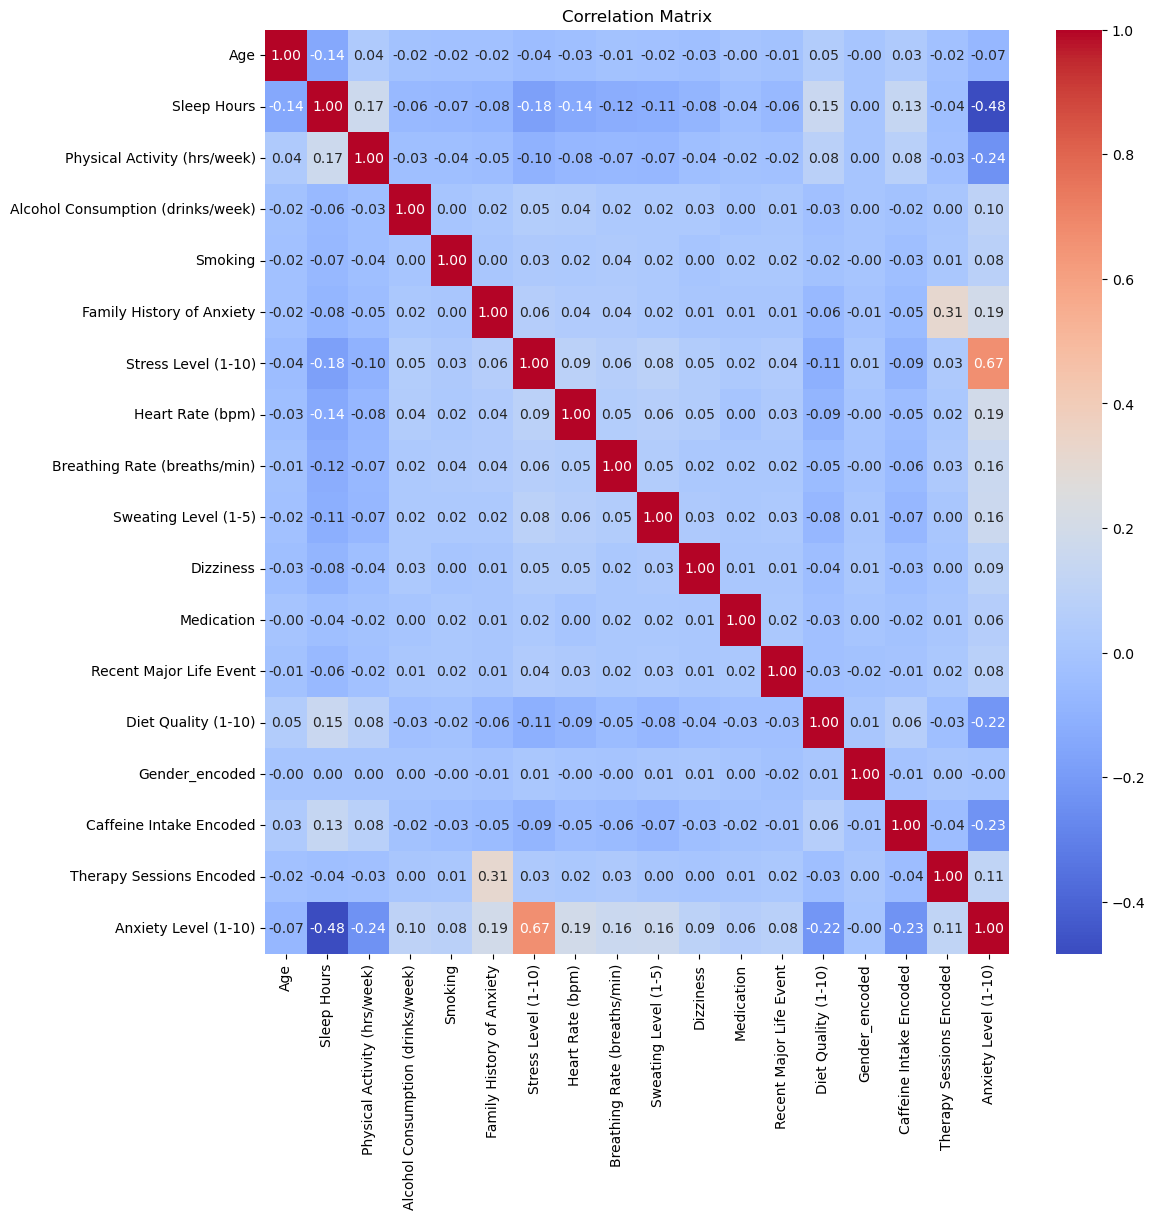

In [37]:
numerical_columns = ['Age', 'Sleep Hours', 'Physical Activity (hrs/week)','Alcohol Consumption (drinks/week)',
       'Smoking', 'Family History of Anxiety', 'Stress Level (1-10)',
       'Heart Rate (bpm)', 'Breathing Rate (breaths/min)',
       'Sweating Level (1-5)', 'Dizziness', 'Medication','Recent Major Life Event',
       'Diet Quality (1-10)', 'Gender_encoded','Caffeine Intake Encoded','Therapy Sessions Encoded', 'Anxiety Level (1-10)']
df_corr = df_encoded[numerical_columns]

correlation_matrix = df_corr.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## Regression

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor  
from sklearn.metrics import mean_squared_error, r2_score
from joblib import dump

# افترض أن DataFrame الخاص بك يسمى df_encoded

### 1. تحديد الأعمدة المرتبطة بمستوى القلق
occupation_columns = df_encoded.filter(like='Occupation_').columns.tolist()

selected_columns = [
    'Stress Level (1-10)',
    'Therapy Sessions (per month)',
    'Caffeine Intake (mg/day)',
    'Sleep Hours',
    'Physical Activity (hrs/week)'
] + occupation_columns

### 2. تقسيم البيانات إلى X و y
X = df_encoded[selected_columns]
y = df_encoded['Anxiety Level (1-10)']

### 3. تطبيق StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# حفظ StandardScaler لاستخدامه لاحقًا
dump(scaler, 'scaler.joblib')

### 4. تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### 5. تجربة نماذج الانحدار
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "XGBoost Regressor": XGBRegressor(random_state=42) 
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'MSE': mse, 'R²': r2}
    
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R² Score: {r2:.4f}\n")

Model: Linear Regression
Mean Squared Error: 1.3467
R² Score: 0.7094

Model: Ridge Regression
Mean Squared Error: 1.3467
R² Score: 0.7094

Model: Lasso Regression
Mean Squared Error: 3.6187
R² Score: 0.2191

Model: Decision Tree Regressor
Mean Squared Error: 2.1900
R² Score: 0.5274

Model: Random Forest Regressor
Mean Squared Error: 1.1628
R² Score: 0.7491

Model: XGBoost Regressor
Mean Squared Error: 1.1375
R² Score: 0.7545



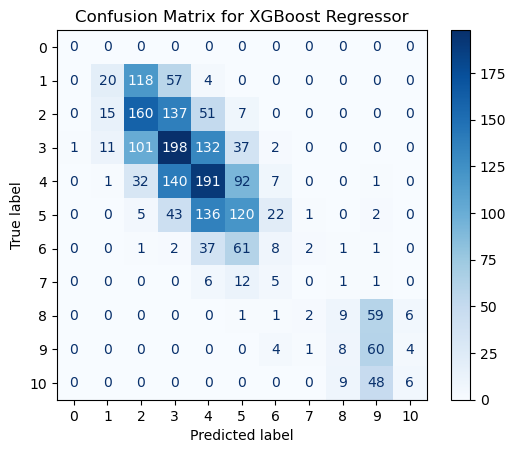

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay
from joblib import dump
import matplotlib.pyplot as plt

occupation_columns = df_encoded.filter(like='Occupation_').columns.tolist()

selected_columns = [
    'Stress Level (1-10)',
    'Therapy Sessions (per month)',
    'Caffeine Intake (mg/day)',
    'Sleep Hours',
    'Physical Activity (hrs/week)'
] + occupation_columns

### 2. تقسيم البيانات إلى X و y
X = df_encoded[selected_columns]
y = df_encoded['Anxiety Level (1-10)']

### 3. تطبيق StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# حفظ StandardScaler لاستخدامه لاحقًا
dump(scaler, 'scaler.joblib')

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred_round = y_pred.round().astype(int)

cm = confusion_matrix(y_test, y_pred_round)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for XGBoost Regressor")
plt.show()

C:\Users\HandaZa\AppData\Local\Temp\ipykernel_16016\3770675870.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Anxiety Level (1-10)', data=df_encoded, palette='viridis')


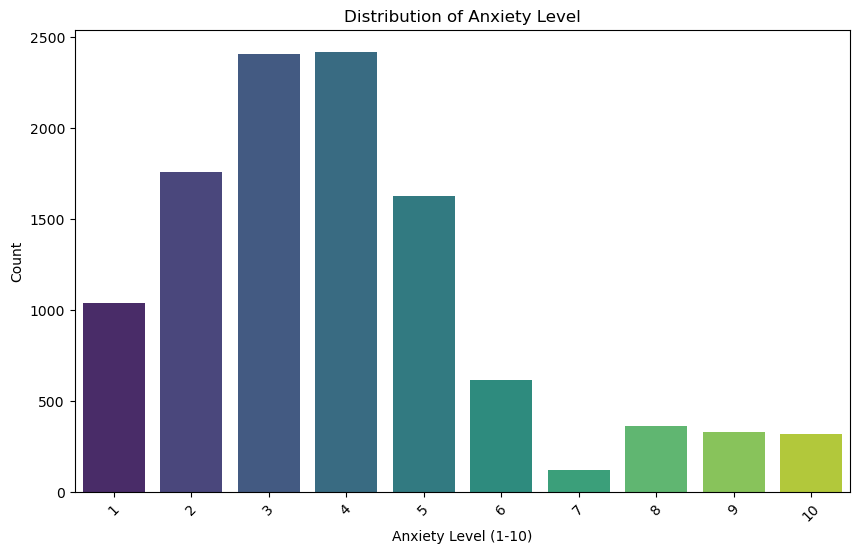

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Anxiety Level (1-10)', data=df_encoded, palette='viridis')
plt.title('Distribution of Anxiety Level')
plt.xlabel('Anxiety Level (1-10)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Multi Class Classification

Logistic Regression Accuracy: 0.7709
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1041
           1       0.73      0.73      0.73       932
           2       0.92      0.89      0.90       227

    accuracy                           0.77      2200
   macro avg       0.81      0.80      0.80      2200
weighted avg       0.77      0.77      0.77      2200



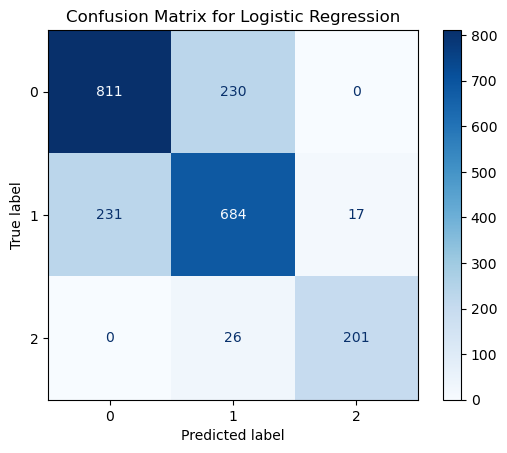

Random Forest Accuracy: 0.7555
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      1041
           1       0.71      0.72      0.71       932
           2       0.98      0.88      0.92       227

    accuracy                           0.76      2200
   macro avg       0.81      0.79      0.80      2200
weighted avg       0.76      0.76      0.76      2200



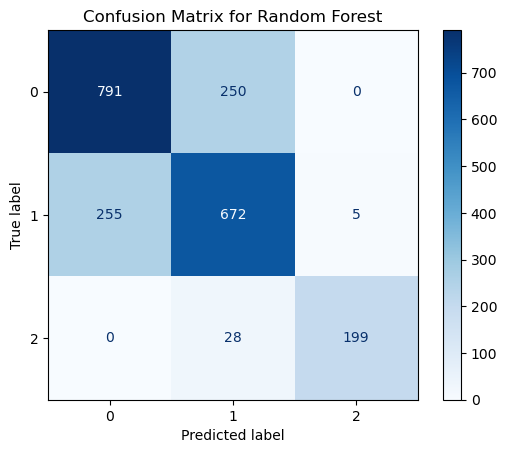

SVM Accuracy: 0.7759
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1041
           1       0.73      0.75      0.74       932
           2       0.98      0.88      0.93       227

    accuracy                           0.78      2200
   macro avg       0.83      0.80      0.82      2200
weighted avg       0.78      0.78      0.78      2200



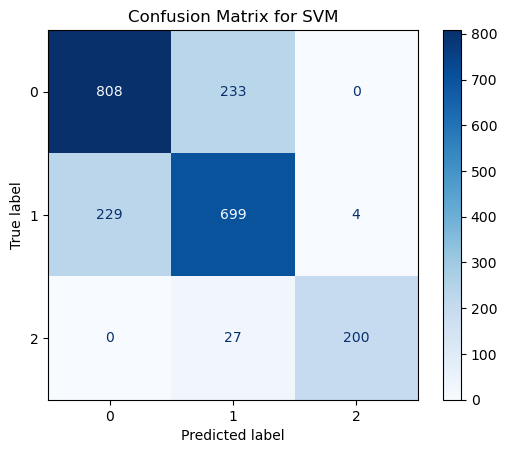

Decision Tree Accuracy: 0.6918
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1041
           1       0.64      0.62      0.63       932
           2       0.80      0.89      0.84       227

    accuracy                           0.69      2200
   macro avg       0.72      0.74      0.73      2200
weighted avg       0.69      0.69      0.69      2200



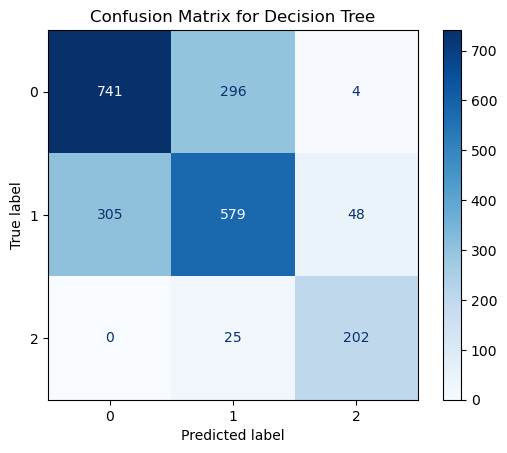

XGBoost Accuracy: 0.7636
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76      1041
           1       0.71      0.74      0.73       932
           2       0.97      0.89      0.93       227

    accuracy                           0.76      2200
   macro avg       0.82      0.79      0.81      2200
weighted avg       0.77      0.76      0.76      2200



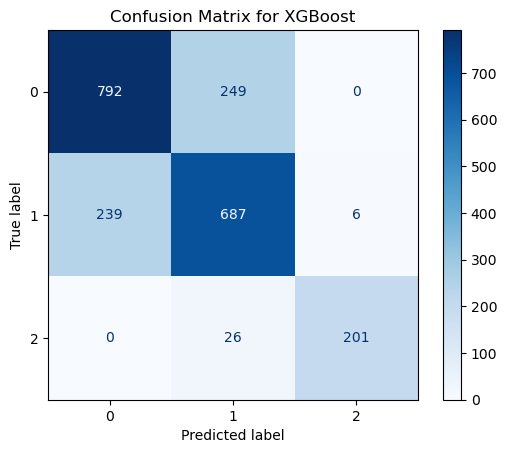

Gradient Boosting Accuracy: 0.7782
Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1041
           1       0.73      0.75      0.74       932
           2       0.96      0.88      0.92       227

    accuracy                           0.78      2200
   macro avg       0.83      0.80      0.81      2200
weighted avg       0.78      0.78      0.78      2200



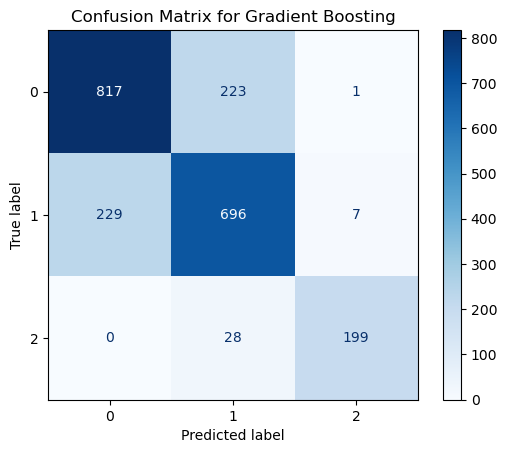

AdaBoost Accuracy: 0.7536
Classification Report for AdaBoost:
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      1041
           1       0.71      0.70      0.71       932
           2       0.92      0.81      0.86       227

    accuracy                           0.75      2200
   macro avg       0.80      0.77      0.78      2200
weighted avg       0.76      0.75      0.75      2200



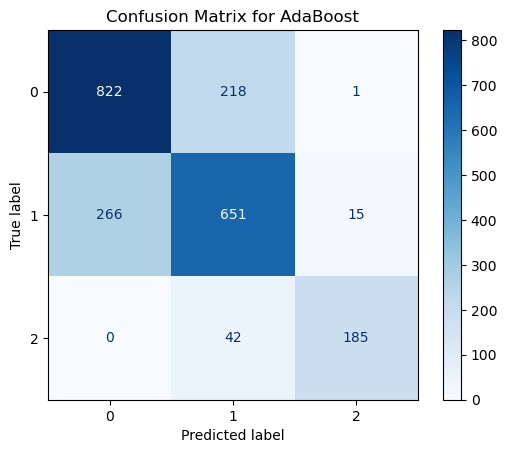

Extra Trees Accuracy: 0.7459
Classification Report for Extra Trees:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1041
           1       0.70      0.71      0.70       932
           2       0.96      0.88      0.92       227

    accuracy                           0.75      2200
   macro avg       0.80      0.78      0.79      2200
weighted avg       0.75      0.75      0.75      2200



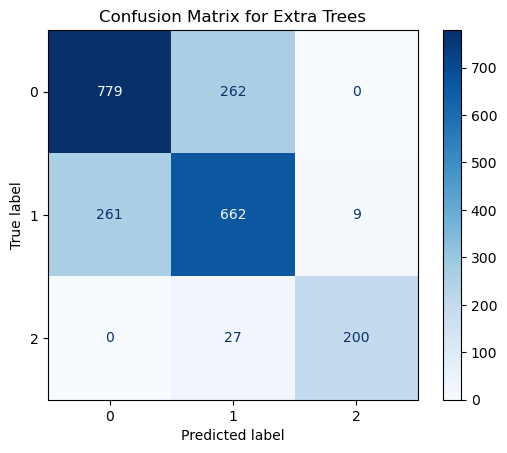

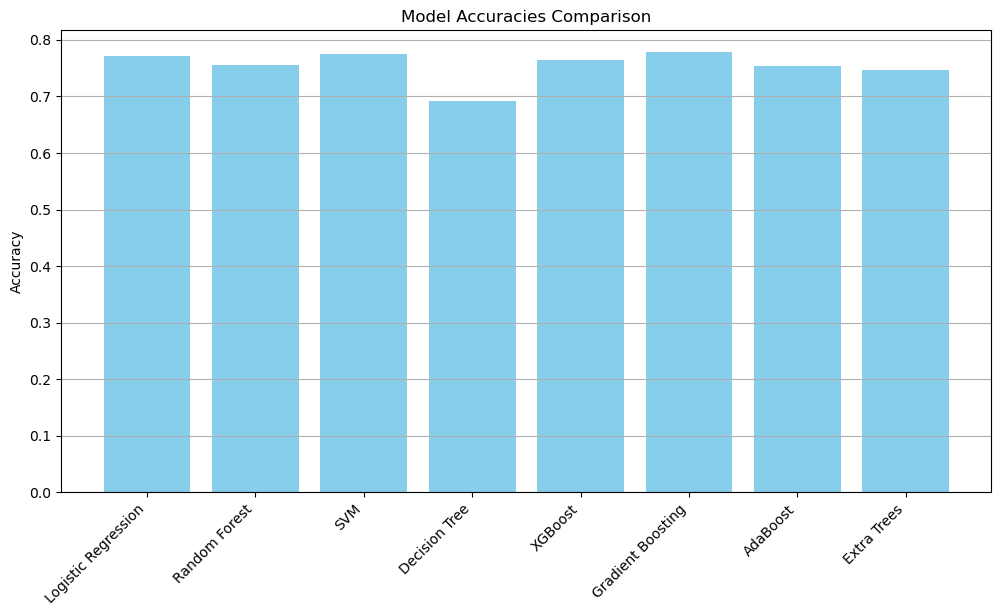

In [41]:
# استيراد المكتبات
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from joblib import dump
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')  # تجاهل التحذيرات علشان الشكل يكون أنضف

# استخراج الأعمدة
occupation_columns = df_encoded.filter(like='Occupation_').columns.tolist()

selected_columns = [
    'Stress Level (1-10)',
    'Therapy Sessions (per month)',
    'Caffeine Intake (mg/day)',
    'Sleep Hours',
    'Physical Activity (hrs/week)'
] + occupation_columns

### 1. تجهيز X و y
X = df_encoded[selected_columns]
y = df_encoded['Anxiety Level (1-10)']

# 2. تحويل القيم إلى فئات
def map_anxiety_level(x):
    if 1 <= x <= 3:
        return 0  # Low
    elif 4 <= x <= 6:
        return 1  # Medium
    else:
        return 2  # High

y = y.apply(map_anxiety_level)

# 3. تطبيق StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# حفظ الـ Scaler
dump(scaler, 'scaler.joblib')

# 4. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 5. تعريف كل الموديلات
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42)
}

# 6. تدريب وتقييم
accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    accuracies[name] = acc

    print(f"{name} Accuracy: {acc:.4f}")
    print(f"Classification Report for {name}:\n{classification_report(y_test, preds)}")
    
    # رسم مصفوفة الارتباك
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix for {name}")
    plt.show()
    print("="*60)

# 7. رسم مقارنة الأداء
plt.figure(figsize=(12, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title("Model Accuracies Comparison")
plt.grid(axis='y')
plt.show()


## Binary Classification

Logistic Regression Accuracy: 0.8595
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1849
           1       0.54      0.87      0.67       351

    accuracy                           0.86      2200
   macro avg       0.75      0.87      0.79      2200
weighted avg       0.90      0.86      0.87      2200



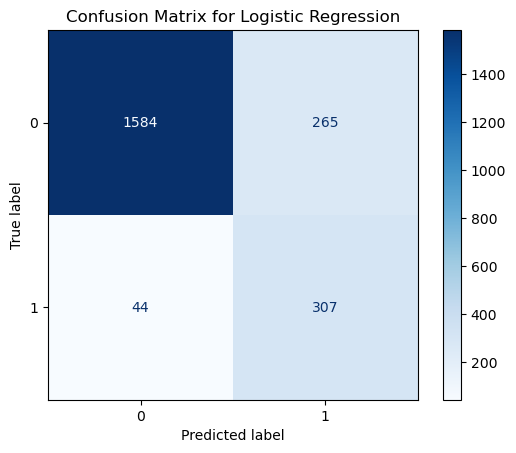

Random Forest Accuracy: 0.9250
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1849
           1       0.86      0.63      0.73       351

    accuracy                           0.93      2200
   macro avg       0.90      0.81      0.84      2200
weighted avg       0.92      0.93      0.92      2200



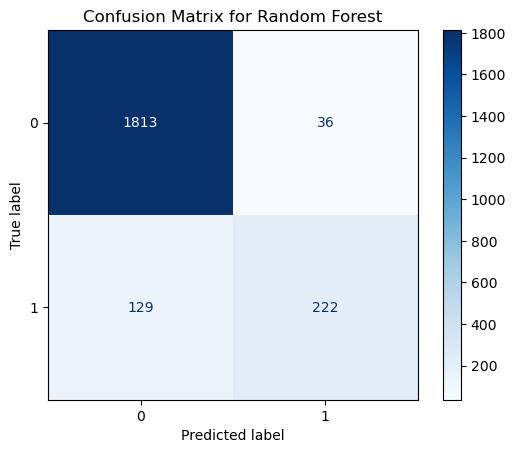

SVM Accuracy: 0.9327
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1849
           1       0.96      0.60      0.74       351

    accuracy                           0.93      2200
   macro avg       0.94      0.80      0.85      2200
weighted avg       0.93      0.93      0.93      2200



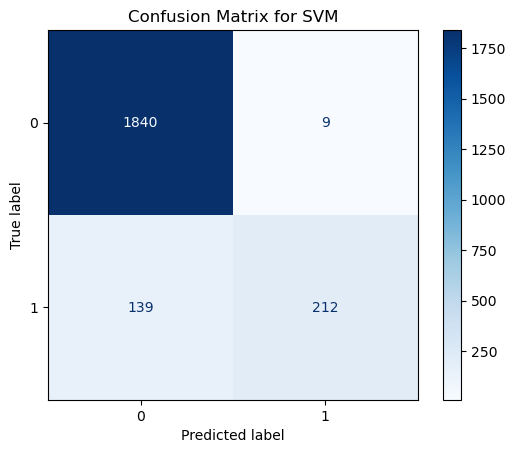

Decision Tree Accuracy: 0.8859
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1849
           1       0.63      0.68      0.66       351

    accuracy                           0.89      2200
   macro avg       0.79      0.80      0.79      2200
weighted avg       0.89      0.89      0.89      2200



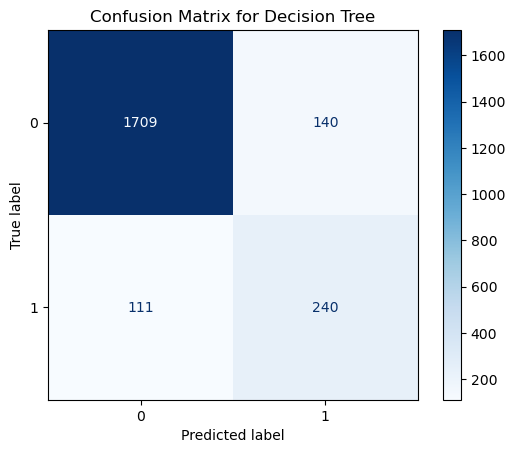

XGBoost Accuracy: 0.9200
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1849
           1       0.80      0.67      0.73       351

    accuracy                           0.92      2200
   macro avg       0.87      0.82      0.84      2200
weighted avg       0.92      0.92      0.92      2200



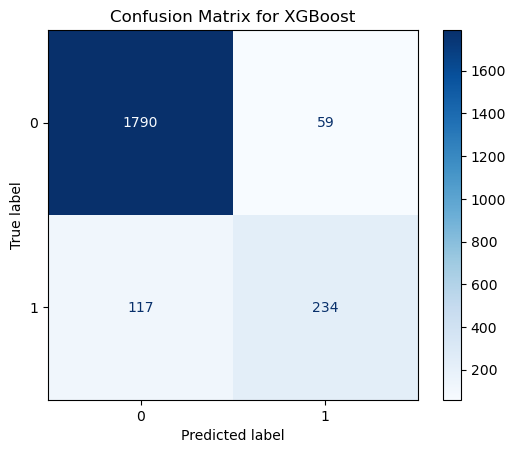

Gradient Boosting Accuracy: 0.9282
Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1849
           1       0.86      0.65      0.74       351

    accuracy                           0.93      2200
   macro avg       0.90      0.82      0.85      2200
weighted avg       0.93      0.93      0.92      2200



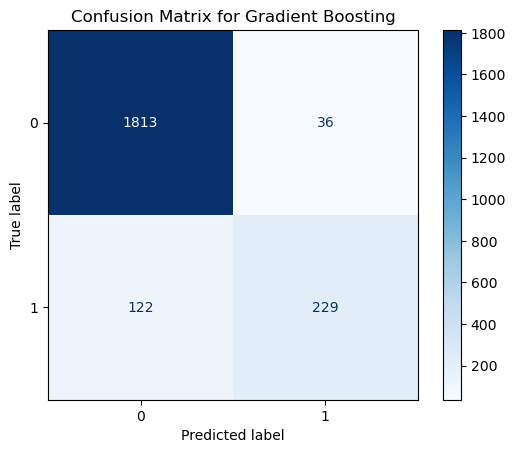

AdaBoost Accuracy: 0.9273
Classification Report for AdaBoost:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1849
           1       0.84      0.67      0.75       351

    accuracy                           0.93      2200
   macro avg       0.89      0.82      0.85      2200
weighted avg       0.92      0.93      0.92      2200



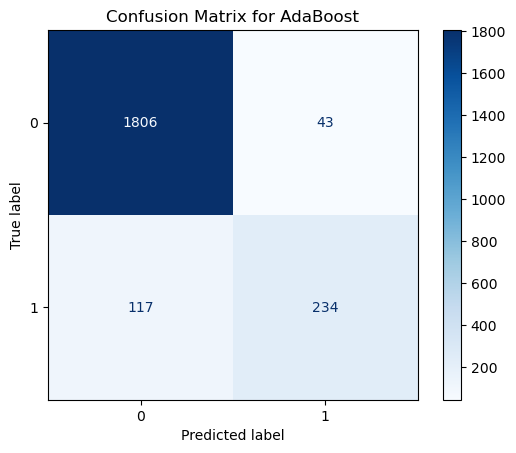

Extra Trees Accuracy: 0.9232
Classification Report for Extra Trees:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1849
           1       0.84      0.64      0.73       351

    accuracy                           0.92      2200
   macro avg       0.89      0.81      0.84      2200
weighted avg       0.92      0.92      0.92      2200



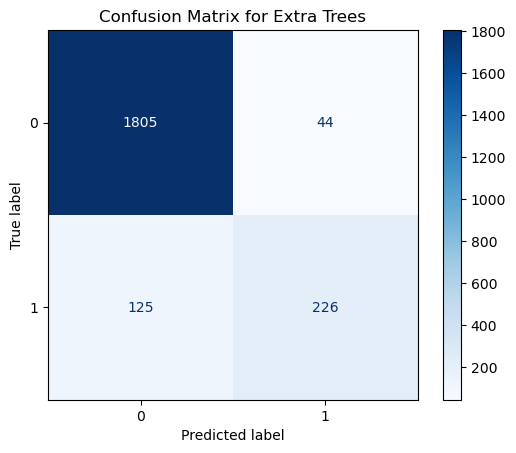

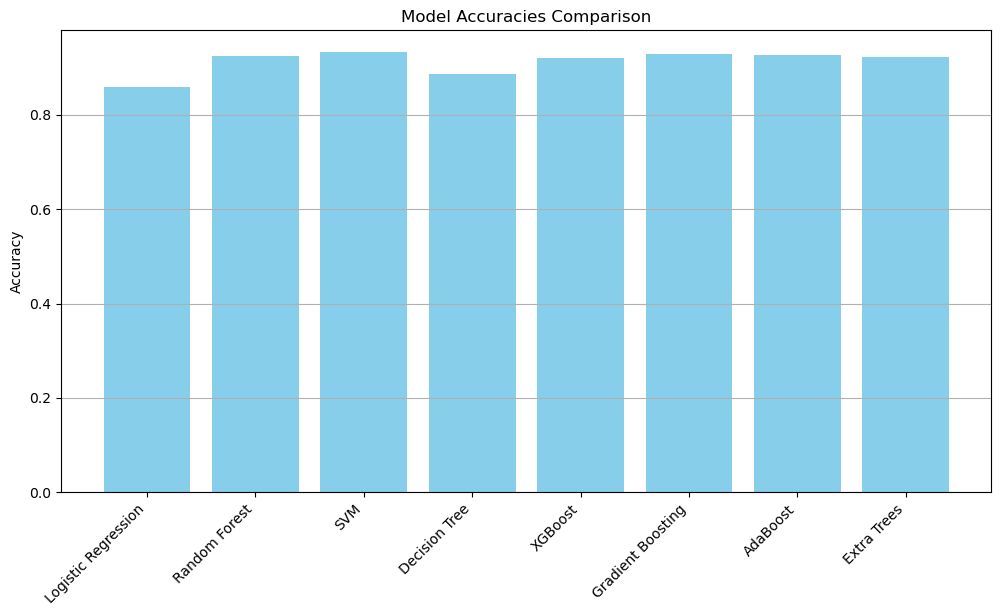

In [42]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from joblib import dump
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# استخراج الأعمدة
occupation_columns = df_encoded.filter(like='Occupation_').columns.tolist()

selected_columns = [
    'Stress Level (1-10)',
    'Therapy Sessions (per month)',
    'Caffeine Intake (mg/day)',
    'Sleep Hours',
    'Physical Activity (hrs/week)'
] + occupation_columns

### 1. تجهيز X و y
X = df_encoded[selected_columns]
y = df_encoded['Anxiety Level (1-10)']

# 2. تحويل القيم إلى فئات
def map_anxiety_level(x):
    if 1 <= x <= 5:
        return 0  # Low
    else:
        return 1  # High

y = y.apply(map_anxiety_level)

# 3. تطبيق StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# حفظ الـ Scaler
dump(scaler, 'scaler.joblib')

# 4. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 5. تعريف كل الموديلات
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42)
}

# 6. تدريب وتقييم
accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    accuracies[name] = acc

    print(f"{name} Accuracy: {acc:.4f}")
    print(f"Classification Report for {name}:\n{classification_report(y_test, preds)}")
    
    # رسم مصفوفة الارتباك
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix for {name}")
    plt.show()
    print("="*60)

# 7. رسم مقارنة الأداء
plt.figure(figsize=(12, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title("Model Accuracies Comparison")
plt.grid(axis='y')
plt.show()


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from joblib import dump
import matplotlib.pyplot as plt

# # افترض أن DataFrame الخاص بك يسمى df_encoded

# ### 1. تحديد الأعمدة المرتبطة بمستوى القلق
# occupation_columns = df_encoded.filter(like='Occupation_').columns.tolist()

# selected_columns = [
#     'Stress Level (1-10)',
#     'Therapy Sessions (per month)',
#     'Caffeine Intake (mg/day)',
#     'Sleep Hours',
#     'Physical Activity (hrs/week)'
# ] + occupation_columns

# ### 2. تقسيم البيانات إلى X و y
# X = df_encoded[selected_columns]
# y = df_encoded['Anxiety Level (1-10)']

# ### 3. تحويل y إلى تصنيفات (Discretization)
# # تحديد النطاقات والفئات
# bins = [float('-inf'), 3, 7, float('inf')]  # النطاقات
# labels = ['Low', 'Medium', 'High']          # أسماء الفئات

# # تقسيم القيم المستهدفة إلى فئات
# y_categories = pd.cut(y, bins=bins, labels=labels)

# ### 4. تحويل الفئات النصية إلى قيم عددية
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y_categories)

# # حفظ LabelEncoder لاستخدامه لاحقًا
# dump(label_encoder, 'label_encoder.joblib')

# ### 5. تطبيق StandardScaler على X
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # حفظ StandardScaler لاستخدامه لاحقًا
# dump(scaler, 'scaler.joblib')

# ### 6. تقسيم البيانات إلى تدريب واختبار
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# ### 7. تجربة نماذج التصنيف
# models = {
#     "Logistic Regression": LogisticRegression(random_state=42),
#     "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
#     "Random Forest Classifier": RandomForestClassifier(random_state=42),
#     "XGBoost Classifier": XGBClassifier(random_state=42)
# }

# results = {}

# for name, model in models.items():
#     # تدريب النموذج
#     model.fit(X_train, y_train)
    
#     # تنبؤات على بيانات الاختبار
#     y_pred = model.predict(X_test)
    
#     # تحويل التنبؤات إلى فئات نصية
#     y_test_labels = label_encoder.inverse_transform(y_test)
#     y_pred_labels = label_encoder.inverse_transform(y_pred)
    
#     # حساب Classification Report
#     report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
#     results[name] = {
#         "Precision": report['weighted avg']['precision'],
#         "Recall": report['weighted avg']['recall'],
#         "F1-Score": report['weighted avg']['f1-score'],
#         "Accuracy": report['accuracy']
#     }
    
#     print(f"Model: {name}")
#     print("Classification Report:")
#     print(classification_report(y_test_labels, y_pred_labels))
    
#     # رسم Confusion Matrix
#     cm = confusion_matrix(y_test_labels, y_pred_labels)
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
#     disp.plot(cmap="Blues")
#     plt.title(f"Confusion Matrix for {name}")
#     plt.show()

# ### 8. عرض النتائج
# print("\nResults Summary:")
# for name, metrics in results.items():
#     print(f"{name}:")
#     print(f"  Precision: {metrics['Precision']:.4f}")
#     print(f"  Recall: {metrics['Recall']:.4f}")
#     print(f"  F1-Score: {metrics['F1-Score']:.4f}")
#     print(f"  Accuracy: {metrics['Accuracy']:.4f}\n")

In [47]:
from joblib import dump

occupation_columns = df_encoded.filter(like='Occupation_').columns.tolist()
selected_columns = [
    'Stress Level (1-10)',
    'Therapy Sessions (per month)',
    'Caffeine Intake (mg/day)',
    'Sleep Hours',
    'Physical Activity (hrs/week)'
] + occupation_columns

X = df_encoded[selected_columns]
y = df_encoded['Anxiety Level (1-10)'].apply(lambda x: 1 if x > 5 else 0)  # Binary classification

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Save the model and scaler
dump(svm_model, 'svm_model.joblib')
dump(scaler, 'scaler.joblib')

# Print model accuracy
print(f"Model accuracy: {svm_model.score(X_test_scaled, y_test):.2%}")

Model accuracy: 93.45%
